<a href="https://colab.research.google.com/github/saracmbr/Code_Demo/blob/master/classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [71]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [72]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [73]:
train_data=train_data/(train_data.max())

test_data=test_data/255.

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

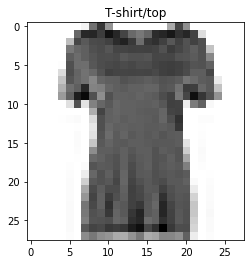

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[10], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[10]]);

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(20, activation="relu"),
  ###tf.keras.layers.Dense(4, activation="relu"), was overfitting 
  tf.keras.layers.Dense(10, activation="softmax")
]) 

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5851 - accuracy: 0.7956 - val_loss: 70.3235 - val_accuracy: 0.8120
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4341 - accuracy: 0.8480 - val_loss: 118.5198 - val_accuracy: 0.7828
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4029 - accuracy: 0.8576 - val_loss: 70.0727 - val_accuracy: 0.8194
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3833 - accuracy: 0.8648 - val_loss: 85.2142 - val_accuracy: 0.7988
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3714 - accuracy: 0.8691 - val_loss: 101.2641 - val_accuracy: 0.7904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3604 - accuracy: 0.8722 - val_loss: 88.1650 - val_accuracy: 0.8019
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3531 - accuracy: 0.8753 - val_loss: 74.6927 - va

In [79]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8865 - val_loss: 0.4058 - val_accuracy: 0.8603 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3119 - accuracy: 0.8867 - val_loss: 0.4711 - val_accuracy: 0.8508 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3124 - accuracy: 0.8866 - val_loss: 0.3938 - val_accuracy: 0.8587 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.8849 - val_loss: 0.4141 - val_accuracy: 0.8535 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3148 - accuracy: 0.8855 - val_loss: 0.4177 - val_accuracy: 0.8517 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3158 - accuracy: 0.8856 - val_loss: 0.4191 - val_accuracy: 0.8478 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

In [80]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
]) 

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0022),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,train_labels,
                                epochs=15,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5337 - accuracy: 0.8145 - val_loss: 0.4603 - val_accuracy: 0.8313
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4146 - accuracy: 0.8499 - val_loss: 0.4708 - val_accuracy: 0.8357
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3825 - accuracy: 0.8625 - val_loss: 0.4359 - val_accuracy: 0.8354
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3645 - accuracy: 0.8684 - val_loss: 0.4256 - val_accuracy: 0.8472
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3536 - accuracy: 0.8712 - val_loss: 0.4351 - val_accuracy: 0.8463
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3418 - accuracy: 0.8749 - val_loss: 0.4235 - val_accuracy: 0.8481
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3380 - accuracy: 0.8767 - val_loss: 0.4060 - val_accuracy:

In [91]:
y_probs = model.predict(test_data[100])
###.argmax(), class_names[model.predict(test_data[30]).argmax()]

1/1 [==============================] - 0s 37ms/step


In [92]:
y_probs.argmax(), class_names[y_probs.argmax()]

(3, 'Dress')

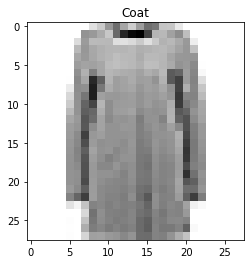

In [94]:
plt.imshow(test_data[150], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[test_labels[150]]);